## 19. Clustering

### The Model

### K-means

In [22]:
from linear_algebra import squared_distance, vector_mean, distance
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [23]:
class KMeans:
    """performs k-means clustering"""
    
    def __init__(self, k):
        self.k = k  # number of clusters
        self.means = None  # means of clusters
        
    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k), 
                    key = lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs):
        
        self.means = random.sample(inputs, self.k)
        assignments = None
        
        while True:
            # Find new assignments
            new_assignments = list(map(self.classify, inputs))
            
            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return
            
            # Otherwise keep the new assignments,
            assignments = new_assignments
            
            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # avoid divide-by-zero if i_points is empty
                if i_points:
                    self.means[i] = vector_mean(i_points)

### KMeans in sklearn.cluster

In [1]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

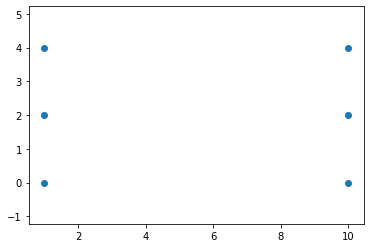

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 2).fit(X)
kmeans.labels_

array([0, 0, 0, 1, 1, 1])

In [16]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 1])

In [20]:
kmeans.cluster_centers_

array([[ 1.,  2.],
       [10.,  2.]])